### Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading The dataset

intern data sheet. Henry Harvin

In [61]:
df = pd.read_excel('Data Sheet for Interns.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
1,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-01 00:00:00,SK,CADM,5000,5000,0
3,2020-04-01 00:00:00,SK,CDCW,7500,7500,0
4,2020-04-01 00:00:00,SK,CDCW,9500,9500,0


In [62]:
#Giving the column name
headers = df.iloc[0]
new_df  = pd.DataFrame(df.values[1:], columns=headers)
new_df.head()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-01 00:00:00,SK,CADM,5000,5000,0
2,2020-04-01 00:00:00,SK,CDCW,7500,7500,0
3,2020-04-01 00:00:00,SK,CDCW,9500,9500,0
4,2020-04-01 00:00:00,IJ,NaN,9500,9500,0


### Checking the NaN value in Dataset.

In [63]:
print("No of Nan values in our dataframe : ", sum(new_df.isnull().any()))

No of Nan values in our dataframe :  6


In [64]:
new_df.isnull().sum()

0
Month              159
Counsellor Name    339
Course Name        500
Fees Total         339
Fees Received      344
Fees Pending       320
dtype: int64

In [65]:
#Checking the NaN values in entire dataset.
df.isnull().sum().sum()

2001

In [66]:
print(df.shape)

(2879, 6)


In [67]:
#Droping the empty row
new_df.dropna(how = 'all', inplace=True)
new_df.head()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
1,2020-04-01 00:00:00,SK,CADM,5000,5000,0
2,2020-04-01 00:00:00,SK,CDCW,7500,7500,0
3,2020-04-01 00:00:00,SK,CDCW,9500,9500,0
4,2020-04-01 00:00:00,IJ,NaN,9500,9500,0
5,2020-04-01 00:00:00,NC,NaN,6000,6000,0


In [68]:
print("No of Nan values in our dataframe : ", sum(new_df.isnull().any()))

No of Nan values in our dataframe :  6


In [69]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


Missingno library offers a very nice way to visualize the distribution of NaN values.
Missingno is a Python library and compatible with Pandas.

In [70]:
import missingno as msno

<AxesSubplot:>

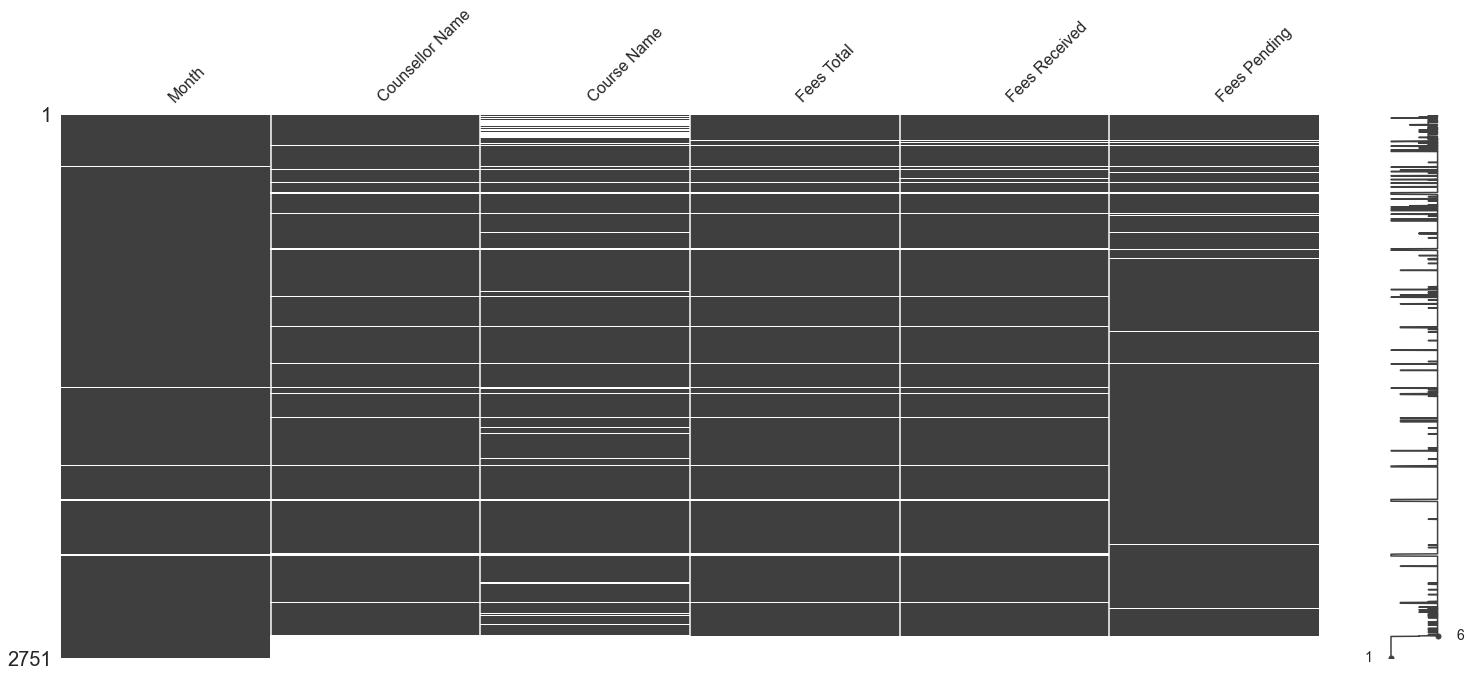

In [71]:
# Visualize missing values as a matrix
msno.matrix(new_df)

counsellor name, fees total and fees received has same NaN trends.

<AxesSubplot:xlabel='0'>

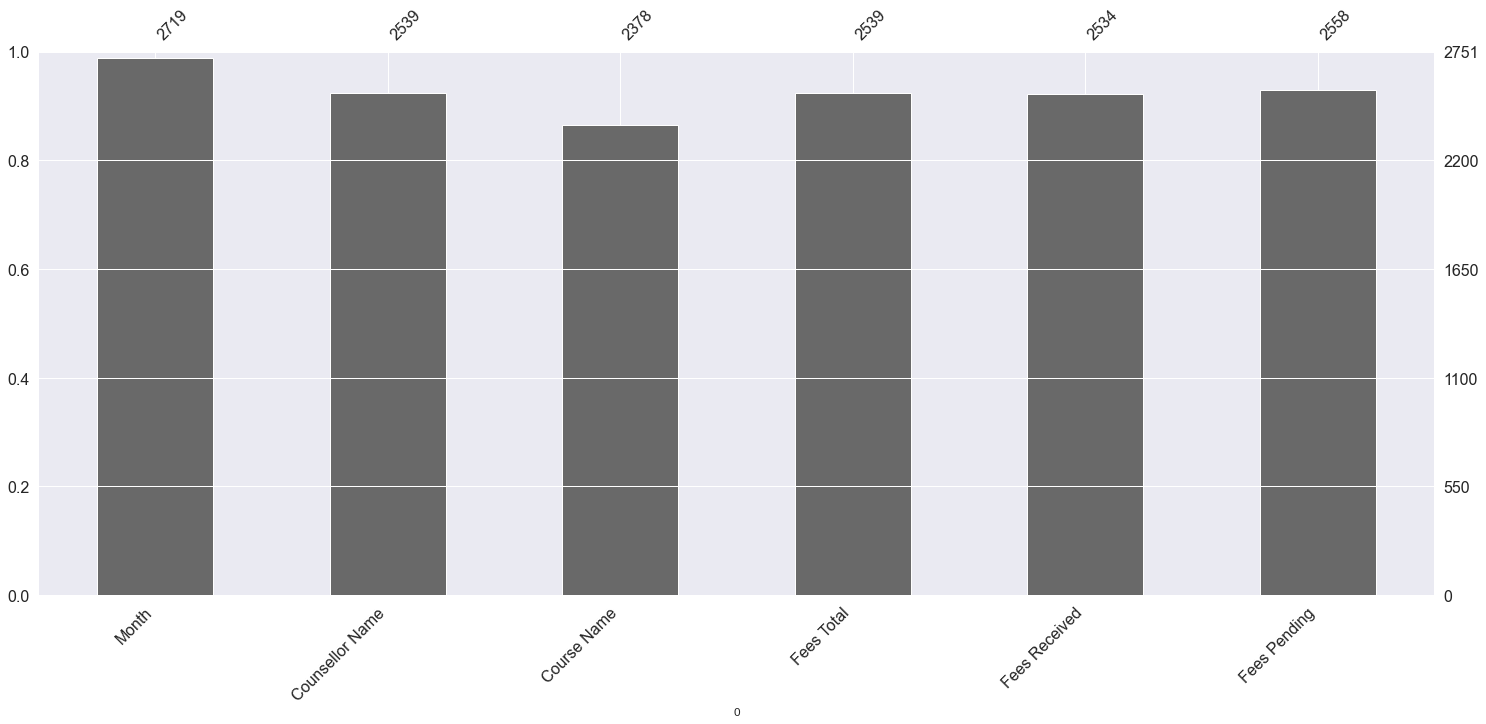

In [72]:
# VisualizING the number of missing, values as a bar chart
msno.bar(new_df)

In [73]:
new_df.shape[1]

6

In [74]:
new_df.dropna(thresh=new_df.shape[1]-2, axis=0, inplace=True)

In [75]:
print(new_df.shape)

(2537, 6)


<AxesSubplot:>

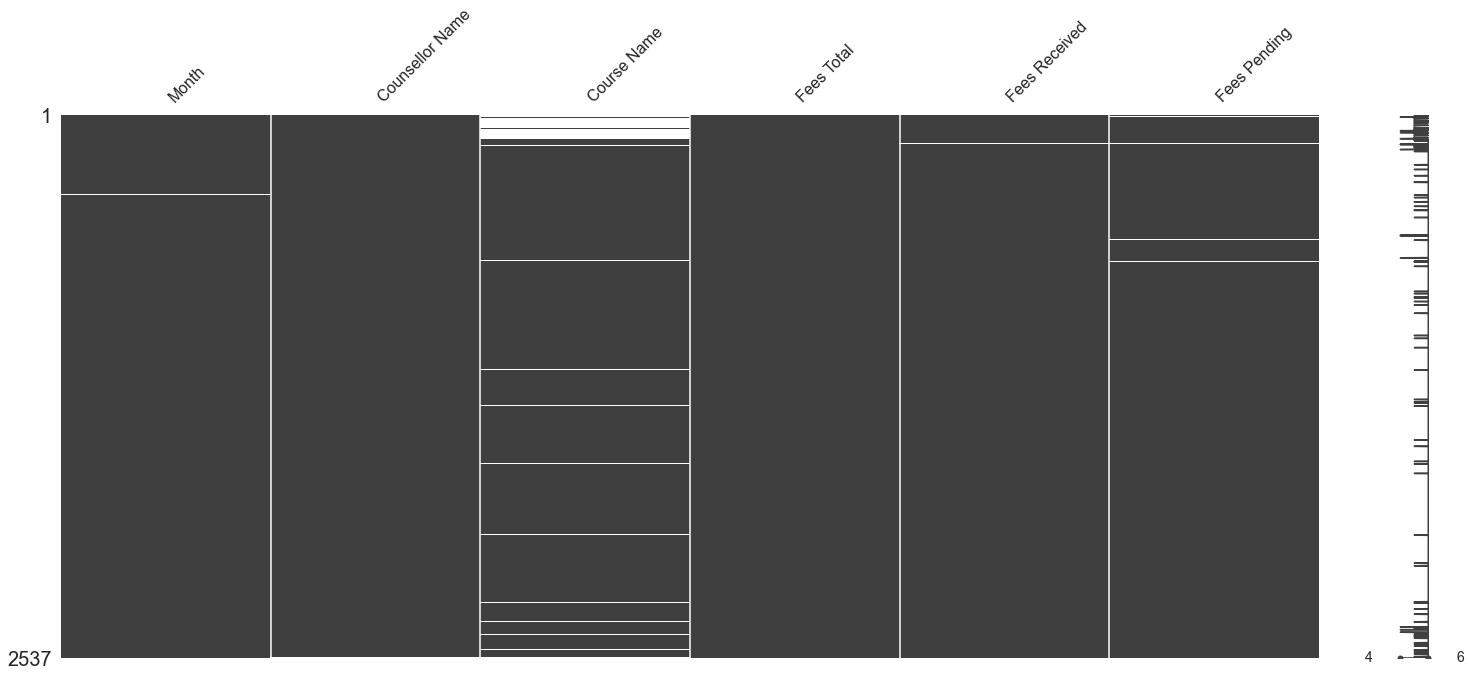

In [76]:
msno.matrix(new_df)

<AxesSubplot:xlabel='0', ylabel='0'>

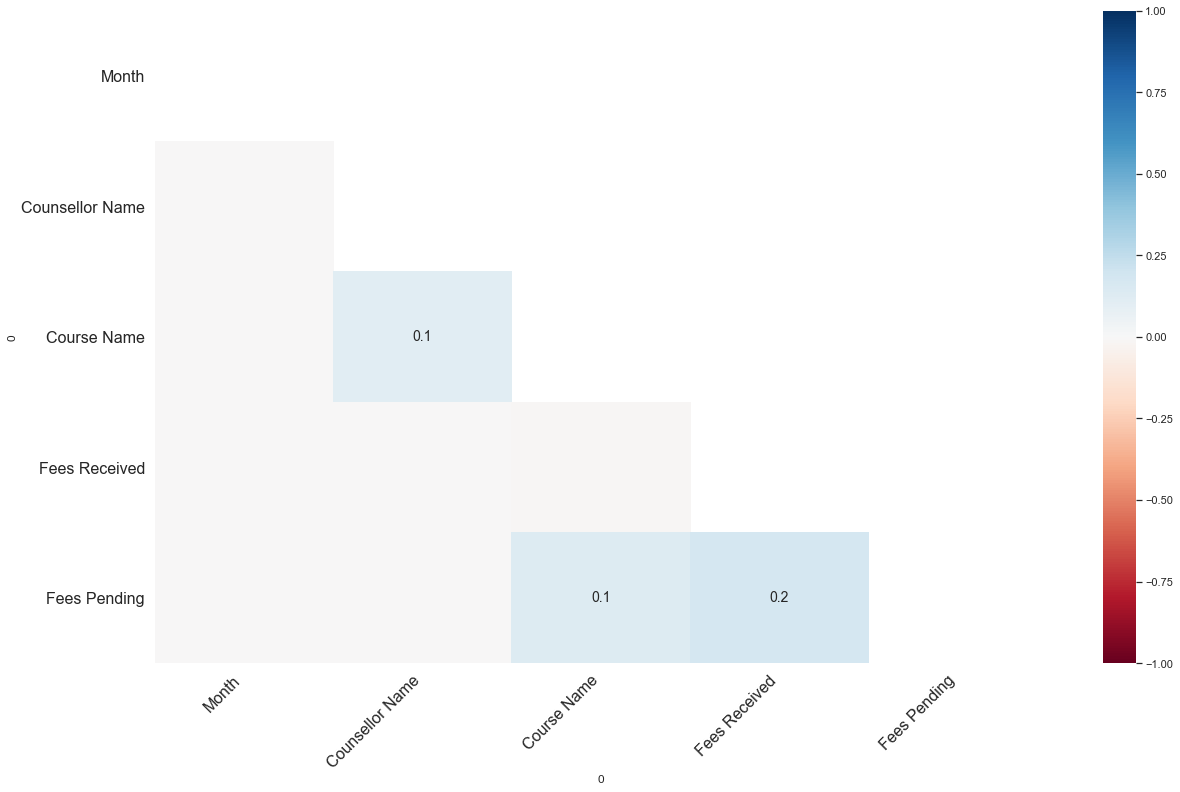

In [77]:
msno.heatmap(new_df)

A value near -1 means if one variable appears then the other variable is very likely to be missing.
A value near 0 means there is no dependence between the occurrence of missing values of two variables.
A value near 1 means if one variable appears then the other variable is very likely to be present.

In [78]:
print(new_df.shape)

(2537, 6)


In [79]:
print(new_df.columns.values)

['Month' 'Counsellor Name' 'Course Name' 'Fees Total' 'Fees Received'
 'Fees Pending']


In [80]:
#Removing Duplicates
dup_bool = new_df.duplicated(['Month', 'Counsellor Name', 'Course Name', 'Fees Total', 'Fees Received', 'Fees Pending'])
dups = sum(dup_bool) # by considering all columns.
print("Number of duplicate rows in dataset = {}".format(dups))

Number of duplicate rows in dataset = 838


In [81]:
new_df.drop_duplicates(keep=False,inplace=True)

In [82]:
#Removing Duplicates
dup_bool = new_df.duplicated(['Month', 'Counsellor Name', 'Course Name', 'Fees Total', 'Fees Received', 'Fees Pending'])
dups = sum(dup_bool) # by considering all columns.
print("Number of duplicate rows in dataset = {}".format(dups))

Number of duplicate rows in dataset = 0


In [83]:
print(new_df.shape)

(1306, 6)


In [84]:
#Checking the NaN values in entire dataset.
new_df.isnull().sum().sum()

119

In [85]:
new_df.describe(include="all")

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
count,1305,1302,1231,1306,1303,1270
unique,18,28,168,218,210,65
top,2021-06-01 00:00:00,SS,CDCW,10000,10000,0
freq,131,188,445,82,79,1137


<AxesSubplot:>

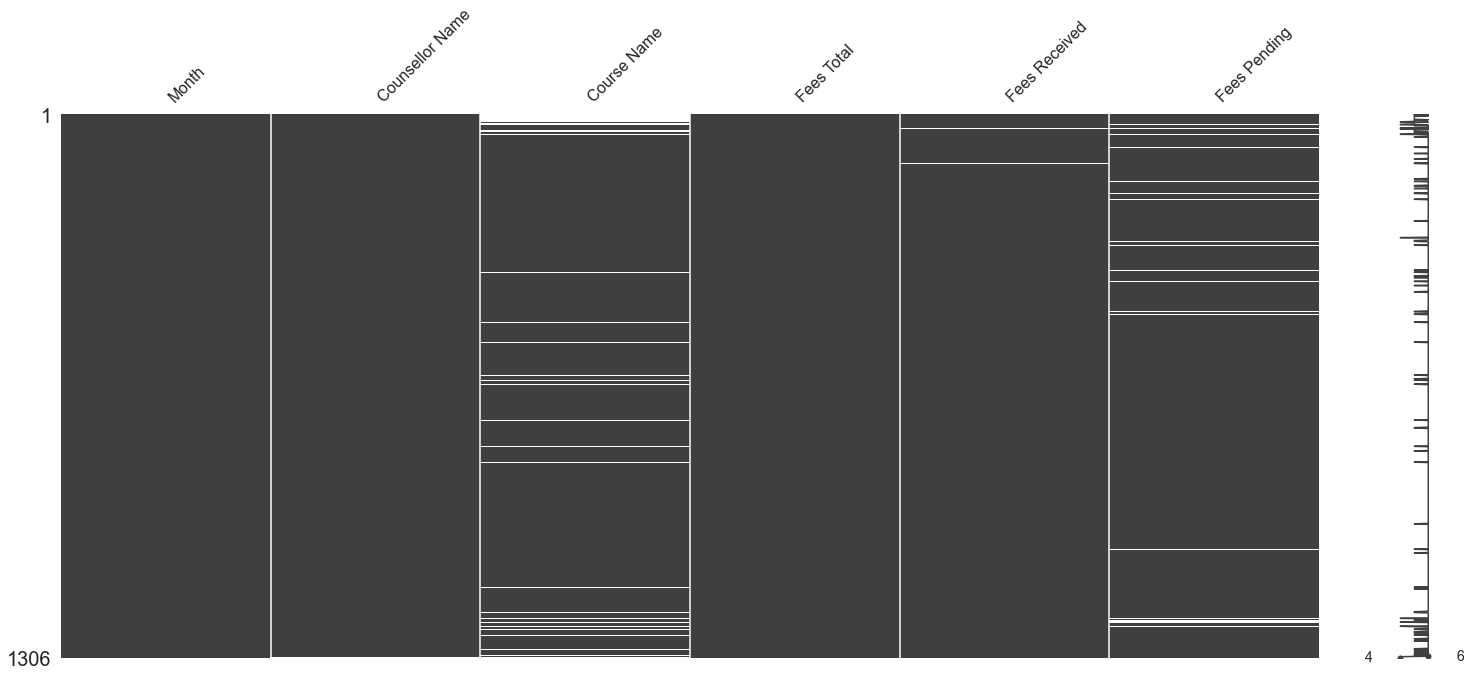

In [86]:
msno.matrix(new_df)

In [87]:
#Checking for the NaN values.
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 1 to 2765
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            1305 non-null   object
 1   Counsellor Name  1302 non-null   object
 2   Course Name      1231 non-null   object
 3   Fees Total       1306 non-null   object
 4   Fees Received    1303 non-null   object
 5   Fees Pending     1270 non-null   object
dtypes: object(6)
memory usage: 71.4+ KB
None


In [88]:
#Deleting the rows having atleast one NaN value.  
new_df.dropna(inplace=True)

<AxesSubplot:>

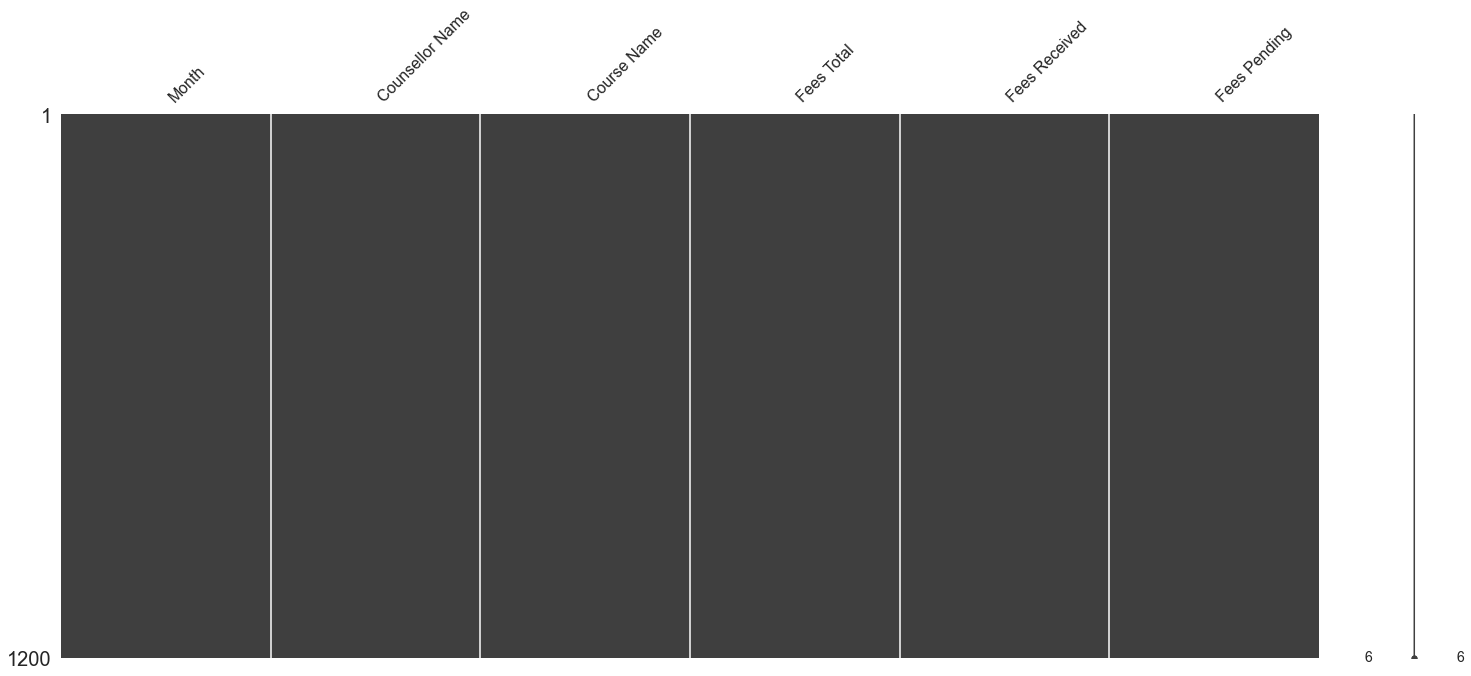

In [89]:
msno.matrix(new_df)

In [90]:
#Checking for the NaN values.
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 2761
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            1200 non-null   object
 1   Counsellor Name  1200 non-null   object
 2   Course Name      1200 non-null   object
 3   Fees Total       1200 non-null   object
 4   Fees Received    1200 non-null   object
 5   Fees Pending     1200 non-null   object
dtypes: object(6)
memory usage: 65.6+ KB
None


In [91]:
for i in new_df.columns:
    print(new_df[i].unique())
    print("\n")

[datetime.datetime(2020, 4, 1, 0, 0) datetime.datetime(2020, 5, 1, 0, 0)
 'megh' datetime.datetime(2020, 6, 1, 0, 0)
 datetime.datetime(2020, 7, 1, 0, 0) datetime.datetime(2020, 8, 1, 0, 0)
 datetime.datetime(2020, 9, 1, 0, 0) datetime.datetime(2020, 10, 1, 0, 0)
 datetime.datetime(2020, 11, 1, 0, 0) datetime.datetime(2020, 12, 1, 0, 0)
 datetime.datetime(2021, 1, 1, 0, 0) datetime.datetime(2021, 2, 1, 0, 0)
 datetime.datetime(2021, 3, 1, 0, 0) datetime.datetime(2021, 4, 1, 0, 0)
 datetime.datetime(2021, 5, 1, 0, 0) datetime.datetime(2021, 6, 1, 0, 0)
 datetime.datetime(2021, 7, 1, 0, 0)]


['SK' 'NK' 'IJ' 'MM' 'NC' 'SS' 'Counsellor Name' 'CD' 'Kim' 'KIM' 'Sahiba'
 'Laiba' 'sahiba' 'Manisha' 'Garima' 'Namrata' 'Hemlata' 'Honey' 'Ayushi'
 'Sunny' 'Iqra' 'Namarta' 'Chandrika' 'Neelam' 'Mehjabee' 'Minali']


['CADM' 'CDCW' 'Creative Writing' 'CDCW+ CADM' 'Technical Writer'
 'CDCW+Creative Writing' 'CDCW+CADM' 'CDCW+CREATIVE' 'SSGB' 'Course Name'
 'CDCW+Creative Writting' 'Creative Writtin

In [92]:
new_df["Fees Total"].replace({"CARRY FORW": 0, "Fees Total": 0, "Carry forwarded":0}, inplace=True)

In [93]:
new_df["Fees Received"].replace({"CARRY FORW": 0, "Fees Total": 0, "Carry forwarded":0}, inplace=True)

In [94]:
new_df["Fees Pending"].replace({"Fees Pending": 0, "Fees Total": 0, "Carry forwarded":0}, inplace=True)

In [95]:
new_df["Fees Received"].replace({"Fees Received": 0, "Fees Total": 0, "Carry forwarded":0}, inplace=True)
new_df["Fees Pending"].replace({"CARRY FORW": 0, "Fees Pending": 0, "Fees Total": 0, "Carry forwarded": 0}, inplace=True)
new_df["Fees Pending"].replace({"0": 0}, inplace=True)

In [96]:
for i in new_df.columns:
    print(new_df[i].unique())
    print("\n")

[datetime.datetime(2020, 4, 1, 0, 0) datetime.datetime(2020, 5, 1, 0, 0)
 'megh' datetime.datetime(2020, 6, 1, 0, 0)
 datetime.datetime(2020, 7, 1, 0, 0) datetime.datetime(2020, 8, 1, 0, 0)
 datetime.datetime(2020, 9, 1, 0, 0) datetime.datetime(2020, 10, 1, 0, 0)
 datetime.datetime(2020, 11, 1, 0, 0) datetime.datetime(2020, 12, 1, 0, 0)
 datetime.datetime(2021, 1, 1, 0, 0) datetime.datetime(2021, 2, 1, 0, 0)
 datetime.datetime(2021, 3, 1, 0, 0) datetime.datetime(2021, 4, 1, 0, 0)
 datetime.datetime(2021, 5, 1, 0, 0) datetime.datetime(2021, 6, 1, 0, 0)
 datetime.datetime(2021, 7, 1, 0, 0)]


['SK' 'NK' 'IJ' 'MM' 'NC' 'SS' 'Counsellor Name' 'CD' 'Kim' 'KIM' 'Sahiba'
 'Laiba' 'sahiba' 'Manisha' 'Garima' 'Namrata' 'Hemlata' 'Honey' 'Ayushi'
 'Sunny' 'Iqra' 'Namarta' 'Chandrika' 'Neelam' 'Mehjabee' 'Minali']


['CADM' 'CDCW' 'Creative Writing' 'CDCW+ CADM' 'Technical Writer'
 'CDCW+Creative Writing' 'CDCW+CADM' 'CDCW+CREATIVE' 'SSGB' 'Course Name'
 'CDCW+Creative Writting' 'Creative Writtin

In [97]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 2761
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            1200 non-null   object 
 1   Counsellor Name  1200 non-null   object 
 2   Course Name      1200 non-null   object 
 3   Fees Total       1200 non-null   float64
 4   Fees Received    1200 non-null   float64
 5   Fees Pending     1200 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 65.6+ KB
None


In [98]:
new_df = new_df[new_df.Month != 'megh']

In [99]:
#Saving the Cleaned Datasheet-1.

new_df.to_excel('Datasheet-3.xlsx')

In [40]:
'''
new_df["Fees Total"] = pd.to_numeric(new_df["Fees Total"])
new_df["Fees Received"] = pd.to_numeric(new_df["Fees Received"])
new_df["Fees Pending"] = pd.to_numeric(new_df["Fees Pending"])
'''

'\nnew_df["Fees Total"] = pd.to_numeric(new_df["Fees Total"])\nnew_df["Fees Received"] = pd.to_numeric(new_df["Fees Received"])\nnew_df["Fees Pending"] = pd.to_numeric(new_df["Fees Pending"])\n'

In [41]:
x1=new_df.groupby('Month')['Fees Total'].sum()
print(x1)

Month
2020-04-01    4.600000e+04
2020-05-01    3.849100e+05
2020-06-01    5.483240e+05
2020-07-01    5.644740e+05
2020-08-01    6.735380e+05
2020-09-01    5.149607e+05
2020-10-01    6.413240e+05
2020-11-01    5.780490e+05
2020-12-01    8.359287e+05
2021-01-01    9.557900e+05
2021-02-01    9.395080e+05
2021-03-01    1.552550e+06
2021-04-01    1.113223e+06
2021-05-01    1.612188e+06
2021-06-01    2.081389e+06
2021-07-01    1.390157e+06
Name: Fees Total, dtype: float64


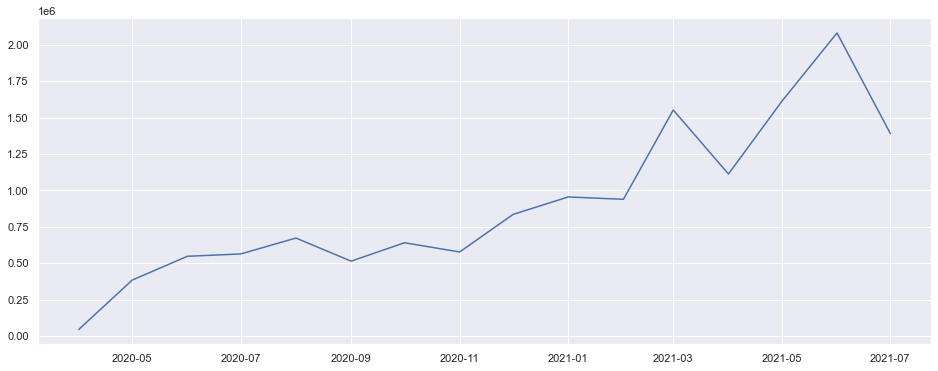

In [42]:
t1 = np.array(x1.index)
t2 = np.array(x1)
plt.figure(figsize=(16,6))
plt.plot(t1, t2)
plt.show()

In [43]:
x2=new_df.groupby('Counsellor Name')['Fees Total'].sum()
print(x2)

Counsellor Name
Ayushi       1.800000e+04
CD           1.104074e+06
Chandrika    1.622500e+05
Garima       2.534500e+05
Hemlata      8.355000e+04
Honey        1.433990e+05
IJ           1.801202e+06
Iqra         1.121750e+05
KIM          2.150000e+04
Kim          1.537343e+06
Laiba        1.346825e+06
MM           1.694172e+06
Manisha      8.464750e+05
Mehjabee     6.550000e+04
Minali       2.500000e+04
NC           1.072002e+06
NK           1.043819e+06
Namarta      2.040000e+05
Namrata      6.551000e+04
Neelam       2.287500e+04
SK           7.086230e+05
SS           1.935460e+06
Sahiba       5.100000e+04
Sunny        9.010900e+04
sahiba       2.400000e+04
Name: Fees Total, dtype: float64


<AxesSubplot:xlabel='Counsellor Name', ylabel='Fees Total'>

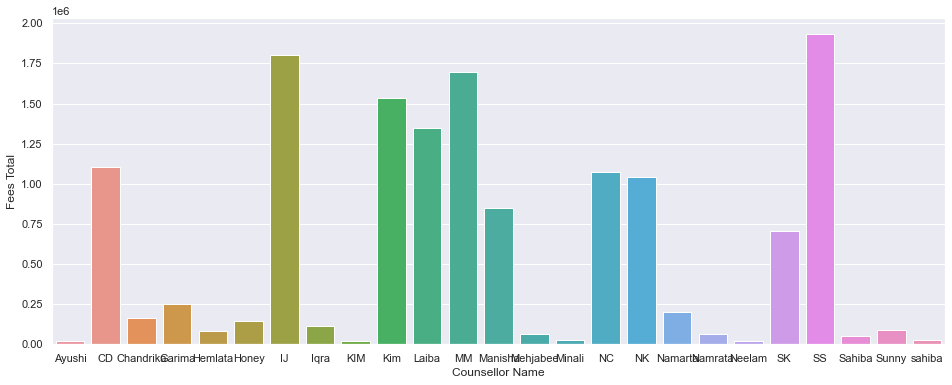

In [44]:
import seaborn as sns

plt.figure(figsize=(16,6))

sns.barplot(x=x2.index, y=x2)

In [45]:
x3=new_df.groupby('Month')['Fees Received'].sum()
print(x3)

Month
2020-04-01    4.600000e+04
2020-05-01    3.605600e+05
2020-06-01    5.121740e+05
2020-07-01    5.409740e+05
2020-08-01    6.046380e+05
2020-09-01    4.849607e+05
2020-10-01    6.008240e+05
2020-11-01    5.506990e+05
2020-12-01    7.940907e+05
2021-01-01    9.482900e+05
2021-02-01    8.945330e+05
2021-03-01    1.424927e+06
2021-04-01    1.071557e+06
2021-05-01    1.595188e+06
2021-06-01    1.908889e+06
2021-07-01    1.203948e+06
Name: Fees Received, dtype: float64


<AxesSubplot:xlabel='Month', ylabel='Fees Received'>

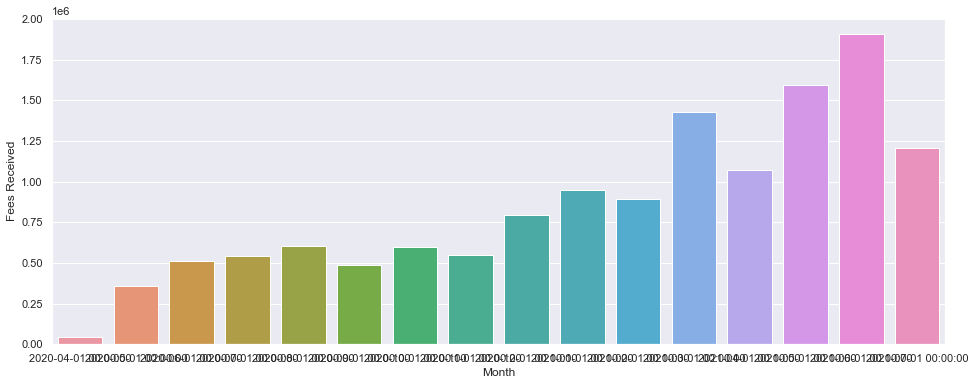

In [46]:
plt.figure(figsize=(16,6))

sns.barplot(x=x3.index, y=x3)

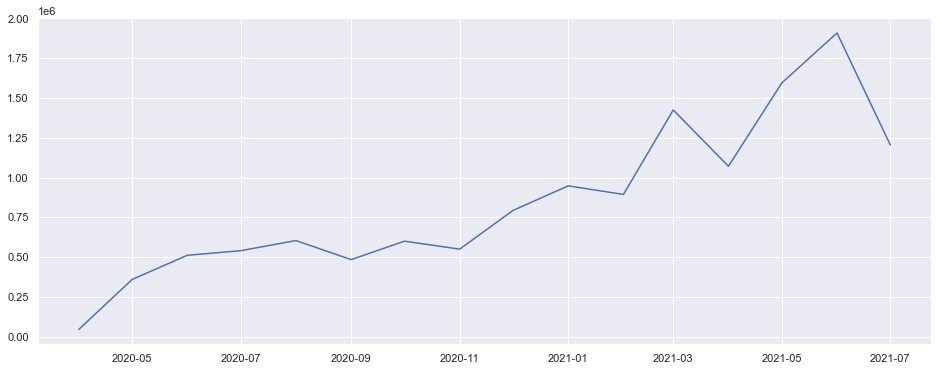

In [47]:
t1 = np.array(x3.index)
t2 = np.array(x3)
plt.figure(figsize=(16,6))
plt.plot(t1, t2)
plt.show()

In [48]:
x4=new_df.groupby('Month')['Fees Pending'].sum()
print(x4)

Month
2020-04-01         0
2020-05-01     24350
2020-06-01     36150
2020-07-01     23500
2020-08-01     68900
2020-09-01     30000
2020-10-01     40500
2020-11-01    -27350
2020-12-01     41838
2021-01-01      7500
2021-02-01     44975
2021-03-01    127623
2021-04-01     63166
2021-05-01     17000
2021-06-01    172500
2021-07-01    175950
Name: Fees Pending, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='Fees Pending'>

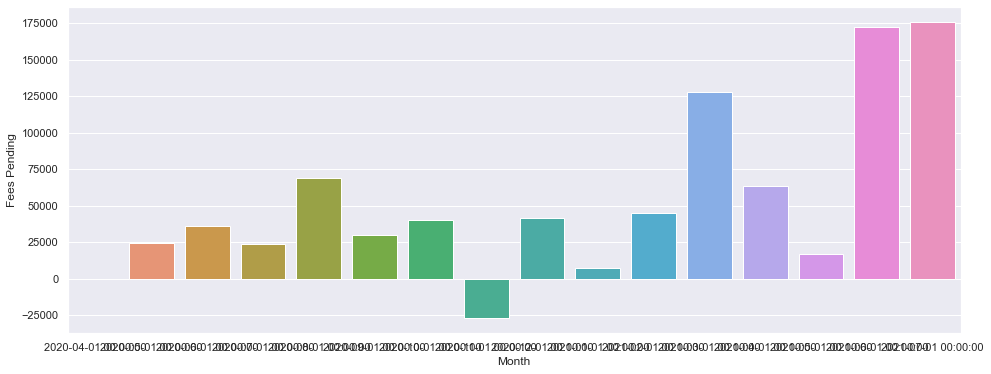

In [49]:
plt.figure(figsize=(16,6))

sns.barplot(x=x4.index, y=x4)

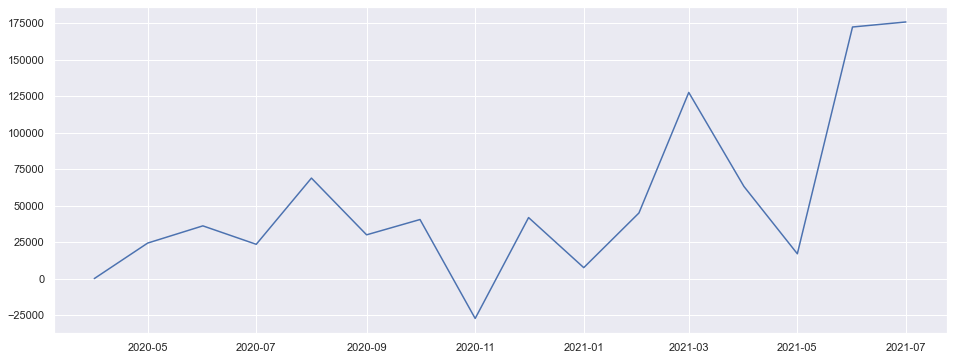

In [50]:
t1 = np.array(x4.index)
t2 = np.array(x4)
plt.figure(figsize=(16,6))
plt.plot(t1, t2)
plt.show()

In [51]:
#groupby/agg to aggregate the groups. 
#For each group, apply set to find the unique strings, and ''.join to concatenate the strings:
new_df.groupby('Counsellor Name').agg(lambda x: ''.join(set(x)))

,Month,Course Name,Fees Total,Fees Received,Fees Pending
Counsellor Name,,,,,
Ayushi,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...
CD,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...
Chandrika,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...
Garima,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...
Hemlata,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...
Honey,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...
IJ,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...
Iqra,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...
KIM,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...,Fees ReceivedFees TotalCourse NameCounsellor N...


### Forecasting Techniques.

####  Areas where time series forecasting is used – 
* Forecasting Sales
* Call Volume in a Call Center
* Solar activity
* Ocean tides
* Stock market behaviour, and many others.

In [52]:
new_df.head()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending
1,2020-04-01 00:00:00,SK,CADM,5000.0,5000.0,0
9,2020-04-01 00:00:00,SK,CDCW,9000.0,9000.0,0
18,2020-04-01 00:00:00,SK,CDCW,6000.0,6000.0,0
53,2020-04-01 00:00:00,SK,CDCW,7000.0,7000.0,0
89,2020-04-01 00:00:00,SK,CDCW,12500.0,12500.0,0


In [53]:
new_df.rename(columns={"Counsellor Name": "Counsellor_Name", "Course Name": "Course_Name", "Fees Total": "Fees_Total", "Fees Received":"Fees_Received", "Fees Pending": "Fees_Pending"})

,Month,Counsellor_Name,Course_Name,Fees_Total,Fees_Received,Fees_Pending
1,2020-04-01 00:00:00,SK,CADM,5000.0,5000.0,0
9,2020-04-01 00:00:00,SK,CDCW,9000.0,9000.0,0
18,2020-04-01 00:00:00,SK,CDCW,6000.0,6000.0,0
53,2020-04-01 00:00:00,SK,CDCW,7000.0,7000.0,0
89,2020-04-01 00:00:00,SK,CDCW,12500.0,12500.0,0
...,...,...,...,...,...,...
2740,2021-07-01 00:00:00,Neelam,CDCW,4000.0,4000.0,0
2742,2021-07-01 00:00:00,Namarta,CCWS,9500.0,5000.0,4500
2743,2021-07-01 00:00:00,Sunny,CDCW,13500.0,6750.0,6750
2753,2021-07-01 00:00:00,Laiba,caws,2700.0,2700.0,0


In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 2761
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            1199 non-null   object 
 1   Counsellor Name  1199 non-null   object 
 2   Course Name      1199 non-null   object 
 3   Fees Total       1199 non-null   float64
 4   Fees Received    1199 non-null   float64
 5   Fees Pending     1199 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 97.9+ KB


In [55]:
new_df['Datetime'] = pd.to_datetime(new_df['Month'])

In [56]:
new_df.head()

,Month,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending,Datetime
1,2020-04-01 00:00:00,SK,CADM,5000.0,5000.0,0,2020-04-01
9,2020-04-01 00:00:00,SK,CDCW,9000.0,9000.0,0,2020-04-01
18,2020-04-01 00:00:00,SK,CDCW,6000.0,6000.0,0,2020-04-01
53,2020-04-01 00:00:00,SK,CDCW,7000.0,7000.0,0,2020-04-01
89,2020-04-01 00:00:00,SK,CDCW,12500.0,12500.0,0,2020-04-01


In [57]:
print(new_df.shape)

(1199, 7)


In [58]:
import datetime
new_df['month'] = new_df['Datetime'].dt.month
new_df['year'] = new_df['Datetime'].dt.year

new_df = new_df.drop(['Month'], axis = 1)

In [59]:
#Saving the Cleaned Datasheet-1.

new_df.to_excel('Datasheet-2.xlsx')

In [ ]:
new_df = new_df.set_index('Datetime')

In [491]:
new_df.head()

,Counsellor Name,Course Name,Fees Total,Fees Received,Fees Pending,month,year
Datetime,,,,,,,
2020-04-01,SK,CADM,5000.0,5000.0,0,4,2020
2020-04-01,SK,CDCW,9000.0,9000.0,0,4,2020
2020-04-01,SK,CDCW,6000.0,6000.0,0,4,2020
2020-04-01,SK,CDCW,7000.0,7000.0,0,4,2020
2020-04-01,SK,CDCW,12500.0,12500.0,0,4,2020


In [492]:
##Creating train and test set 

train=new_df[:800] 
test=new_df[800:]

In [493]:
x6=train.groupby('Datetime')['Fees Total'].sum()
x7=test.groupby('Datetime')['Fees Total'].sum()

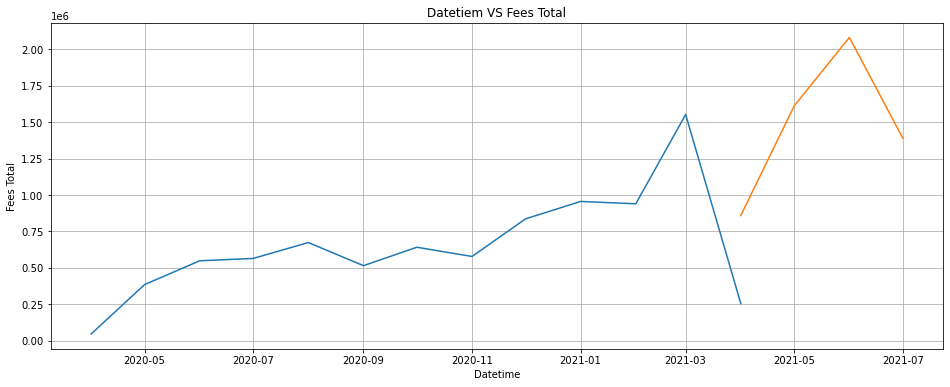

In [494]:
plt.figure(figsize=(16,6))
plt.plot(x6.index, x6)
plt.plot(x7.index, x7)

plt.title('Datetiem VS Fees Total')
plt.xlabel('Datetime')
plt.ylabel('Fees Total')
plt.grid()
plt.show()

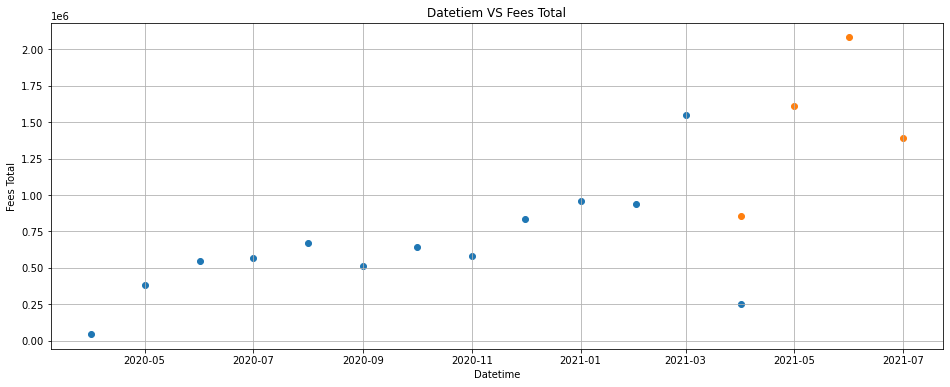

In [495]:

plt.figure(figsize=(16,6))
plt.scatter(x6.index, x6)
plt.scatter(x7.index, x7)

plt.title('Datetiem VS Fees Total')
plt.xlabel('Datetime')
plt.ylabel('Fees Total')
plt.grid()

plt.show()

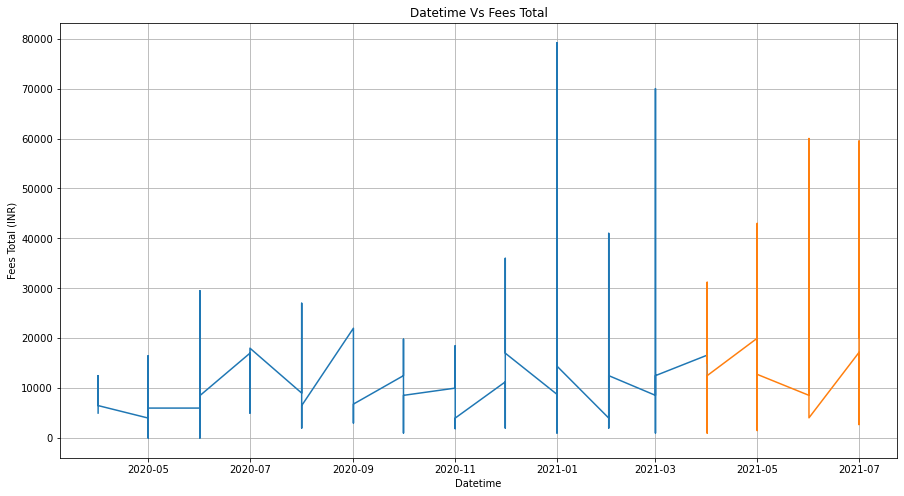

In [499]:

plt.figure(figsize=(15, 8))
plt.plot(train['Fees Total'])
plt.plot(test['Fees Total'])

plt.title('Datetime Vs Fees Total')
plt.ylabel('Fees Total (INR)')
plt.xlabel('Datetime')
plt.grid()
plt.show()

### Methos for forecasting.

#### 1. Naive Approach.

In the naive approach, we simply take the last month value and estimate the same value for the next month. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.
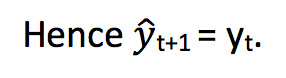

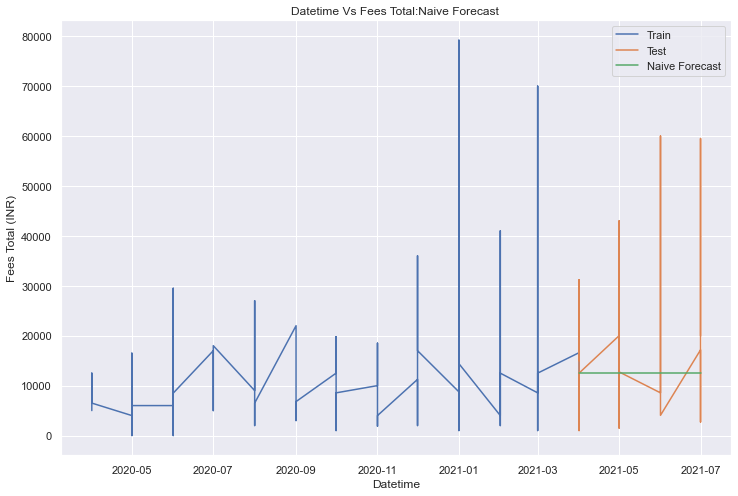

In [519]:
dd= np.asarray(train['Fees Total'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Fees Total'], label='Train')
plt.plot(test.index,test['Fees Total'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')

plt.title('Datetime Vs Fees Total:Naive Forecast ')
plt.ylabel('Fees Total (INR)')
plt.xlabel('Datetime')

plt.show()

In [511]:
#RMSE(Root Mean Squared)

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['Fees Total'], y_hat.naive))
print(rms)

9503.401432881083


#### 2. Simple Average

Many a times we are provided with a dataset, which though varies by a small margin throughout it’s time period, but the average at each time period remains constant. In such a case we can forecast the price of the next month/day somewhere similar to the average of all the past month/day.

Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.

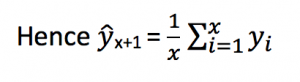

We take all the values previously known, calculate the average and take it as the next value.

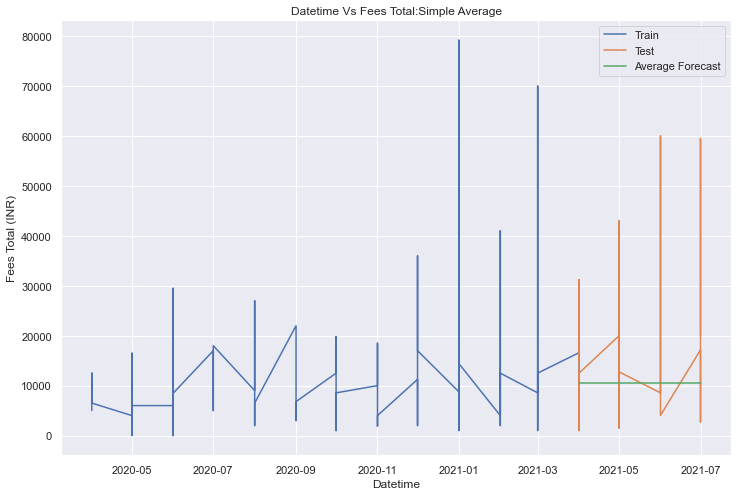

In [516]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Fees Total'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Fees Total'], label='Train')
plt.plot(test['Fees Total'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

plt.title('Datetime Vs Fees Total:Simple Average')
plt.ylabel('Fees Total (INR)')
plt.xlabel('Datetime')
plt.show()

In [520]:
#rms
rms = sqrt(mean_squared_error(test['Fees Total'], y_hat_avg.avg_forecast))
print(rms)

10144.768438060037


#### 3. Moving Average

Many a times we are provided with a dataset, in which the prices/sales of the object increased/decreased sharply some time periods ago. 
In order to use the  previous Average method, we have to use the mean of all the previous data, 
but using all the previous data doesn’t sound right.

Using the prices of the initial period would highly affect the forecast for the next period. 
Therefore as an improvement over simple average, we will take the average of the prices for last few time periods only. 
Obviously the thinking here is that only the recent values matter. 

Such forecasting technique which uses window of time period for calculating the average is called Moving Average technique. 
Calculation of the moving average involves what is sometimes called a “sliding window” of size n.

Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed
finite number ‘p’ of the previous values. Thus, for all i > p

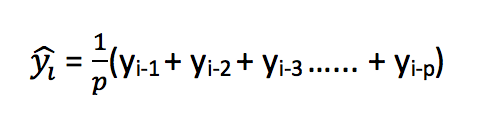



A moving average can actually be quite effective, especially if we pick the right p for the series.

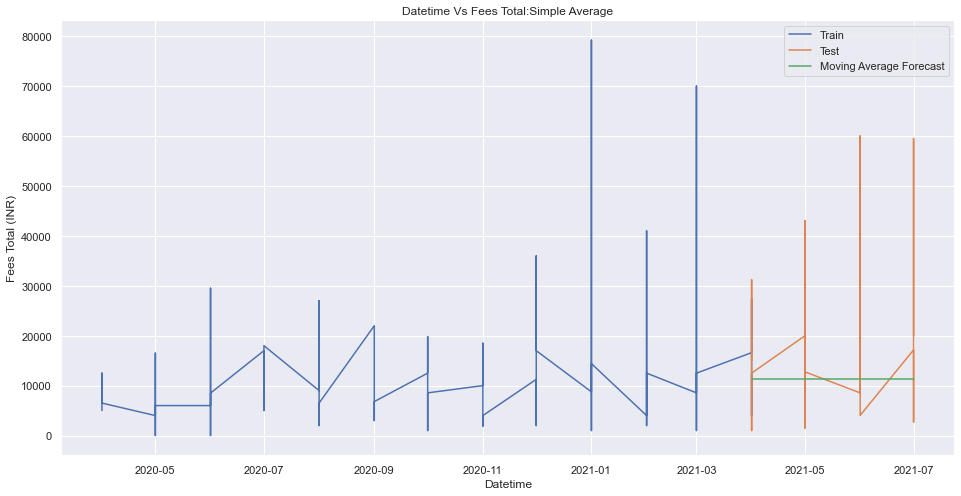

In [523]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Fees Total'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Fees Total'], label='Train')
plt.plot(test['Fees Total'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Datetime Vs Fees Total:Simple Average')
plt.ylabel('Fees Total (INR)')
plt.xlabel('Datetime')
plt.show()

In [525]:
#RMSE
rms = sqrt(mean_squared_error(test['Fees Total'], y_hat_avg.moving_avg_forecast))
print(rms)

9833.956321036507


In [526]:
#Moving Average on complete dataset

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

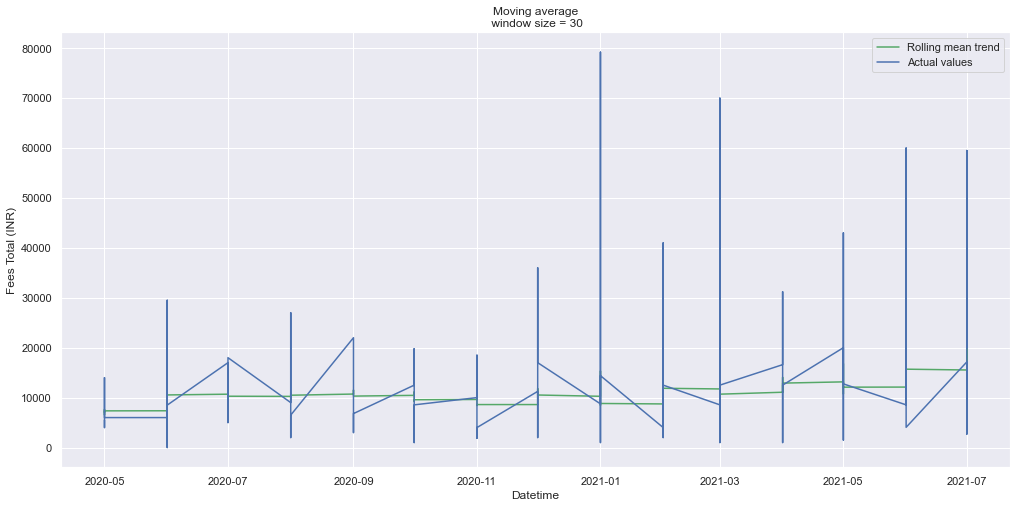

In [530]:
#Smooth by the previous 1 month (30 days)
plot_moving_average(new_df['Fees Total'], 30)
#plt.title('Datetime Vs Fees Total:Simple Average')
plt.ylabel('Fees Total (INR)')
plt.xlabel('Datetime')
plt.show()

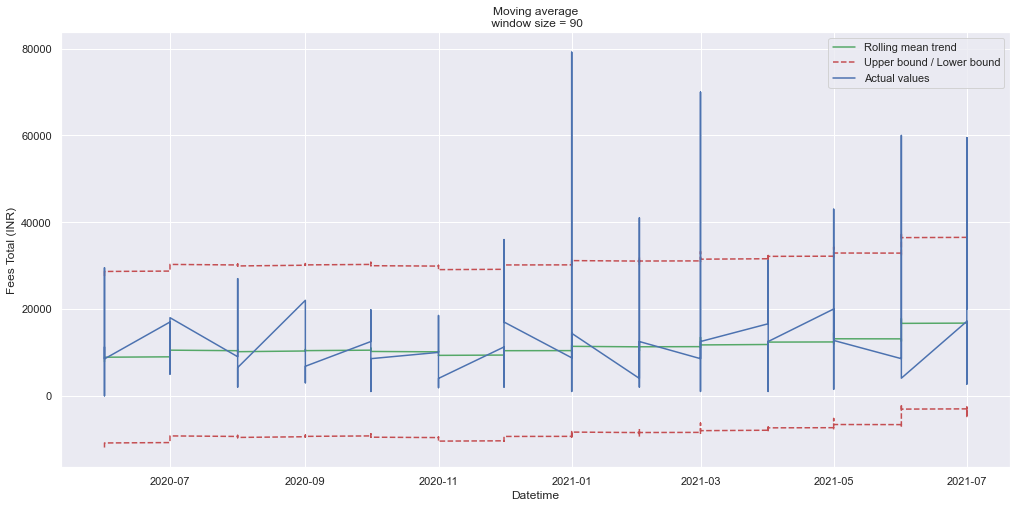

In [532]:
#Smooth by previous quarter (90 days)
plot_moving_average(new_df['Fees Total'], 90, plot_intervals=True)
plt.ylabel('Fees Total (INR)')
plt.xlabel('Datetime')
plt.show()

165